# Project

Jeff Lin   
300 599 323

The corpus is a collectiong of top billboard song lyrics, collected by googleing the top billboard of 2024, and downloading the lyrics from there.

referencing billboard info [here](https://www.officialcharts.com/chart-news/the-official-biggest-songs-of-2024/)

In [1]:
import corpus_loader

# import the corpus from the 2024 folder, this uses my corpus_loader.py file which is a simple script to load the corpus
corpus, corpus_dict, corpus_df = corpus_loader.load_corpus('corpus/2024')

In [2]:
## Check if the nltk corpus is loaded correctly
print(corpus.fileids())
print(corpus.words())

['A Bar Song (Tipsy).txt', "Austin (Boots Stop Workin').txt", 'Beautiful Things.txt', 'Cruel Summer.txt', 'Espresso.txt', 'Lose Control.txt', 'Please Please Please.txt', 'Stick Season.txt', "TEXAS HOLD 'EM.txt", 'Too Sweet.txt']
['My', 'baby', 'want', 'a', 'Birkin', ',', 'she', "'", ...]


In [3]:
## check if the corpus dict is loaded correctly
for text in corpus_dict:
    print(f'{text} \t\t::: {corpus_dict[text][:10]}')

A Bar Song (Tipsy) 		::: My baby wa
Austin (Boots Stop Workin') 		::: We had a p
Beautiful Things 		::: For a whil
Cruel Summer 		::: Fever drea
Espresso 		::: Now he's t
Lose Control 		::: Something'
Please Please Please 		::: I know I h
Stick Season 		::: As you pro
TEXAS HOLD 'EM 		::: This ain't
Too Sweet 		::: It can't b


In [4]:
## Check if the corpus dataframe is loaded correctly

print(corpus_df.head())

                      filename  \
0           A Bar Song (Tipsy)   
1  Austin (Boots Stop Workin')   
2             Beautiful Things   
3                 Cruel Summer   
4                     Espresso   

                                                text  
0  My baby want a Birkin, she's been tellin' me a...  
1  We had a plan, move out of this town, baby\nWe...  
2  For a while there, it was rough\nBut lately, I...  
3  Fever dream high in the quiet of the night\nYo...  
4  Now he's thinkin' 'bout me every night, oh\nIs...  


In [5]:
# Create a custom word processor to process the text and return all variance of the processing outcome, 
# this is so I can compare the different processing methods and make sure all processing methods are 
# working correctly and as expected to all text in the corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

class WordProcessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.regex_tokenizer = RegexpTokenizer(r'\w+')
        self.tokenizer = word_tokenize
        
    def process_text(self, text) -> dict:
        """
        Process the text and return the tokenized, splitted, tokenized alphanumeric, 
        regex tokenized, regex tokenized without stop words, regex tokenized lematized, 
        regex tokenized without stop words and lematized

        Args:
            text (str): Text to be processed

        Returns:
            dict: Dictionary containing all the processed text
        """
        # processing methods
        text = text.lower()
        sp = text.split()
        tk = self.tokenizer(text)
        tk_a = [word for word in tk if word.isalnum()]
        rtk = self.regex_tokenizer.tokenize(text)
        tk_a_sw = [word for word in tk_a if word not in self.stop_words]
        rtk_sw = [word for word in rtk if word not in self.stop_words]
        tk_a_lm = [self.lemmatizer.lemmatize(word) for word in tk_a]
        rtk_lm = [self.lemmatizer.lemmatize(word) for word in rtk]
        tk_a_sw_lm = [self.lemmatizer.lemmatize(word) for word in tk_a_sw]
        rtk_sw_lm = [self.lemmatizer.lemmatize(word) for word in rtk_sw]

        # collect frequency distribution of rtk_lm and rtk_sw_lm
        fdist_rtk = FreqDist(rtk)
        fdist_rtk_lm = FreqDist(rtk_lm)
        fdist_rtk_sw_lm = FreqDist(rtk_sw_lm)

        # return the processed text
        return {
            'tk': tk,       # tokenized

            'sp': sp,       # splitted
            'tk_a': tk_a,   # tokenized alphanumeric
            'rtk': rtk,     # regex tokenized

            'tk_a_sw': tk_a_sw,       # tokenized alphanumeric without stop words
            'rtk_sw': rtk_sw,         # regex tokenized without stop words

            'tk_a_lm': tk_a_lm,       # tokenized alphanumeric lematized
            'rtk_lm': rtk_lm,         # regex tokenized lematized
            
            'tk_a_sw_lm': tk_a_sw_lm, # tokenized alphanumeric without stop words and lematized
            'rtk_sw_lm': rtk_sw_lm    # regex tokenized without stop words and lematized
        }, {
            'fdist_rtk': fdist_rtk,
            'fdist_rtk_lm': fdist_rtk_lm,
            'fdist_rtk_sw_lm': fdist_rtk_sw_lm
        }

In [6]:
# test the word processor
processor = WordProcessor()
test = "This iss? is. aa! test sentence' to checks if the word's processor, is working. correctly and to compare the results of the different' processing methods. It can't have any special characters like @#$%^&*()+{}|:<>?/.,';][=-"

processed, frequencies = processor.process_text(test)

print('Processed:')
for key, value in processed.items():
    print(f'{key}  \t::: {value}')

print('\n\nFrequency distribution:')
for key, value in frequencies.items():
    print(f'{key}  \t::: {value.most_common(10)}')

Processed:
tk  	::: ['this', 'iss', '?', 'is', '.', 'aa', '!', 'test', 'sentence', "'", 'to', 'checks', 'if', 'the', 'word', "'s", 'processor', ',', 'is', 'working', '.', 'correctly', 'and', 'to', 'compare', 'the', 'results', 'of', 'the', 'different', "'", 'processing', 'methods', '.', 'it', 'ca', "n't", 'have', 'any', 'special', 'characters', 'like', '@', '#', '$', '%', '^', '&', '*', '(', ')', '+', '{', '}', '|', ':', '<', '>', '?', '/.', ',', "'", ';', ']', '[', '=-']
sp  	::: ['this', 'iss?', 'is.', 'aa!', 'test', "sentence'", 'to', 'checks', 'if', 'the', "word's", 'processor,', 'is', 'working.', 'correctly', 'and', 'to', 'compare', 'the', 'results', 'of', 'the', "different'", 'processing', 'methods.', 'it', "can't", 'have', 'any', 'special', 'characters', 'like', "@#$%^&*()+{}|:<>?/.,';][=-"]
tk_a  	::: ['this', 'iss', 'is', 'aa', 'test', 'sentence', 'to', 'checks', 'if', 'the', 'word', 'processor', 'is', 'working', 'correctly', 'and', 'to', 'compare', 'the', 'results', 'of', 'the

From the above test, I think it is best to use the results from the pipline of `[regextokenized -> stop words removed -> lematized]` to most accurately gague the meaning and context of the texts, as it is the most effective at removeing excess words and also lets frequency analyser able to work more effectively by the words like `dogs / dog`.   
And the results of the pipeline `[regextokenized -> lematized]` to see the the lexical diversity and see how much filler words are used, as we know many times song lyrics have a heavy use of reapted pattern and/or filler words.

Note:    
there are some slight problems with lematizer, I think it is better to use the lematizer as it provides a more realistic look at the words, but do need to put in mind words like "is" may be wrongly processed as "i".

In [7]:
# test the word processor on the a text in the corpus
text = corpus_dict['Too Sweet']
text_processed, text_freq  = processor.process_text(text)

# check all the processing methods
print('Processed:')
for key, value in text_processed.items():
    print(f'{key}  \t::: {value[:20]}')

# pick out the two preferred processing methods, comparing to pre-processed
print(f'\n\nPreferred processing methods:')
print(f'rtk        :::{text_processed['rtk']}')
print(f'rtk_lm     :::{text_processed['rtk_lm']}')
print(f'rtk_sw_lm  :::{text_processed['rtk_sw_lm']}')

# check the frequency distribution of the two preferred processing methods
print('\n\nFrequency distribution:')
for key, value in text_freq.items():
    print(f'{key}  \t::: {value.most_common(10)}')


Processed:
tk  	::: ['it', 'ca', "n't", 'be', 'said', 'i', "'m", 'an', 'early', 'bird', 'it', "'s", 'ten', "o'clock", 'before', 'i', 'say', 'a', 'word', 'baby']
sp  	::: ['it', "can't", 'be', 'said', "i'm", 'an', 'early', 'bird', "it's", 'ten', "o'clock", 'before', 'i', 'say', 'a', 'word', 'baby,', 'i', 'can', 'never']
tk_a  	::: ['it', 'ca', 'be', 'said', 'i', 'an', 'early', 'bird', 'it', 'ten', 'before', 'i', 'say', 'a', 'word', 'baby', 'i', 'can', 'never', 'tell']
rtk  	::: ['it', 'can', 't', 'be', 'said', 'i', 'm', 'an', 'early', 'bird', 'it', 's', 'ten', 'o', 'clock', 'before', 'i', 'say', 'a', 'word']
tk_a_sw  	::: ['ca', 'said', 'early', 'bird', 'ten', 'say', 'word', 'baby', 'never', 'tell', 'sleep', 'well', 'keep', 'telling', 'live', 'right', 'go', 'bed', 'daylight', 'wake']
rtk_sw  	::: ['said', 'early', 'bird', 'ten', 'clock', 'say', 'word', 'baby', 'never', 'tell', 'sleep', 'well', 'keep', 'telling', 'live', 'right', 'go', 'bed', 'daylight', 'wake']
tk_a_lm  	::: ['it', 'ca'

From the above test, we can see there are filler words like `oh / whoa` left in the text, will need to see the frequency analysis later to decide if it needs to be removed too.

In [8]:
# process the corpus
corpus_raw_processed, corpus_raw_freq = processor.process_text(corpus.raw())
corpus_processed = {}
corpus_freq = {}
for text in corpus_dict:
    corpus_processed[text], corpus_freq[text] = processor.process_text(corpus_dict[text])

# check the processed corpus
print(f'Corpus raw \t\t\t::: size: {len(corpus_raw_processed["rtk_sw_lm"])} :::{corpus_raw_processed["rtk_sw_lm"][:10]}\n')
for text in corpus_processed:
    print(f'{text}\t\t::: size: {len(corpus_processed[text]["rtk_sw_lm"])} :::{corpus_processed[text]["rtk_sw_lm"][:10]}')

# check the frequency distribution of the processed corpus
print('\n\nFrequency distribution:')
for key, value in corpus_freq.items():
    print(f'{key}  \t::: {value['fdist_rtk_sw_lm'].most_common(10)}')

Corpus raw 			::: size: 1789 :::['baby', 'want', 'birkin', 'tellin', 'night', 'long', 'gasoline', 'grocery', 'list', 'go']

A Bar Song (Tipsy)		::: size: 229 :::['baby', 'want', 'birkin', 'tellin', 'night', 'long', 'gasoline', 'grocery', 'list', 'go']
Austin (Boots Stop Workin')		::: size: 150 :::['plan', 'move', 'town', 'baby', 'west', 'sand', 'talked', 'lately', 'pack', 'car']
Beautiful Things		::: size: 123 :::['rough', 'lately', 'doin', 'better', 'last', 'four', 'cold', 'december', 'recall', 'see']
Cruel Summer		::: size: 220 :::['fever', 'dream', 'high', 'quiet', 'night', 'know', 'caught', 'oh', 'yeah', 'right']
Espresso		::: size: 195 :::['thinkin', 'bout', 'every', 'night', 'oh', 'sweet', 'guess', 'say', 'sleep', 'baby']
Lose Control		::: size: 127 :::['something', 'got', 'hold', 'lately', 'know', 'anymore', 'feel', 'like', 'wall', 'closin']
Please Please Please		::: size: 143 :::['know', 'good', 'judgement', 'know', 'good', 'taste', 'funny', 'ironic', 'feel', 'way']
Stick Seaso

C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\2077429245.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\2077429245.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\2077429245.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


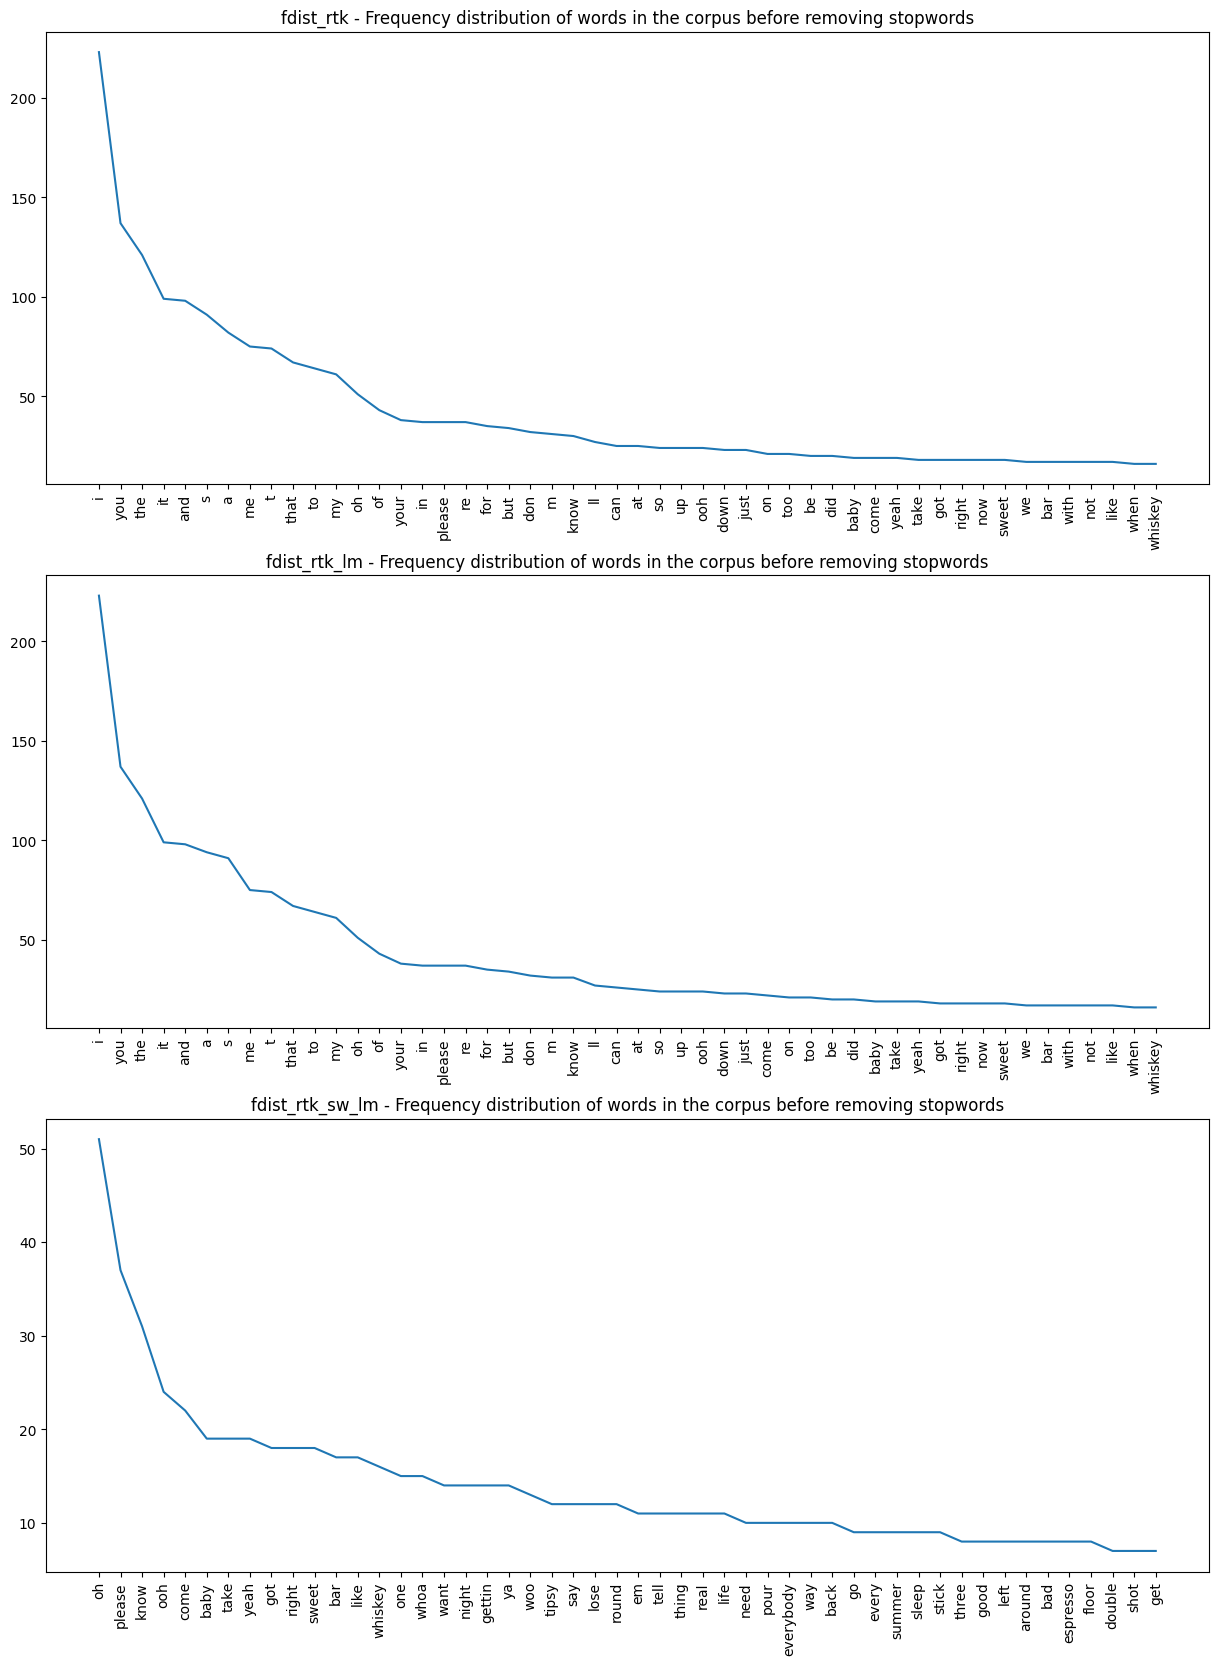

In [9]:
# plot the frequency distribution of the words, with the preprocess and the two preferred processing methods
import matplotlib.pyplot as plt

show_top = 50

fig, axs = plt.subplots(3, 1, figsize=(15, 20))
# using corpus_raw_freq
for i, (key, value) in enumerate(corpus_raw_freq.items()):
    axs[i].plot(*zip(*value.most_common(show_top)))
    axs[i].set_title(f'{key} - Frequency distribution of words in the corpus before removing stopwords')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# plt.tight_layout()
plt.show()

C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\462567921.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\462567921.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_31888\462567921.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


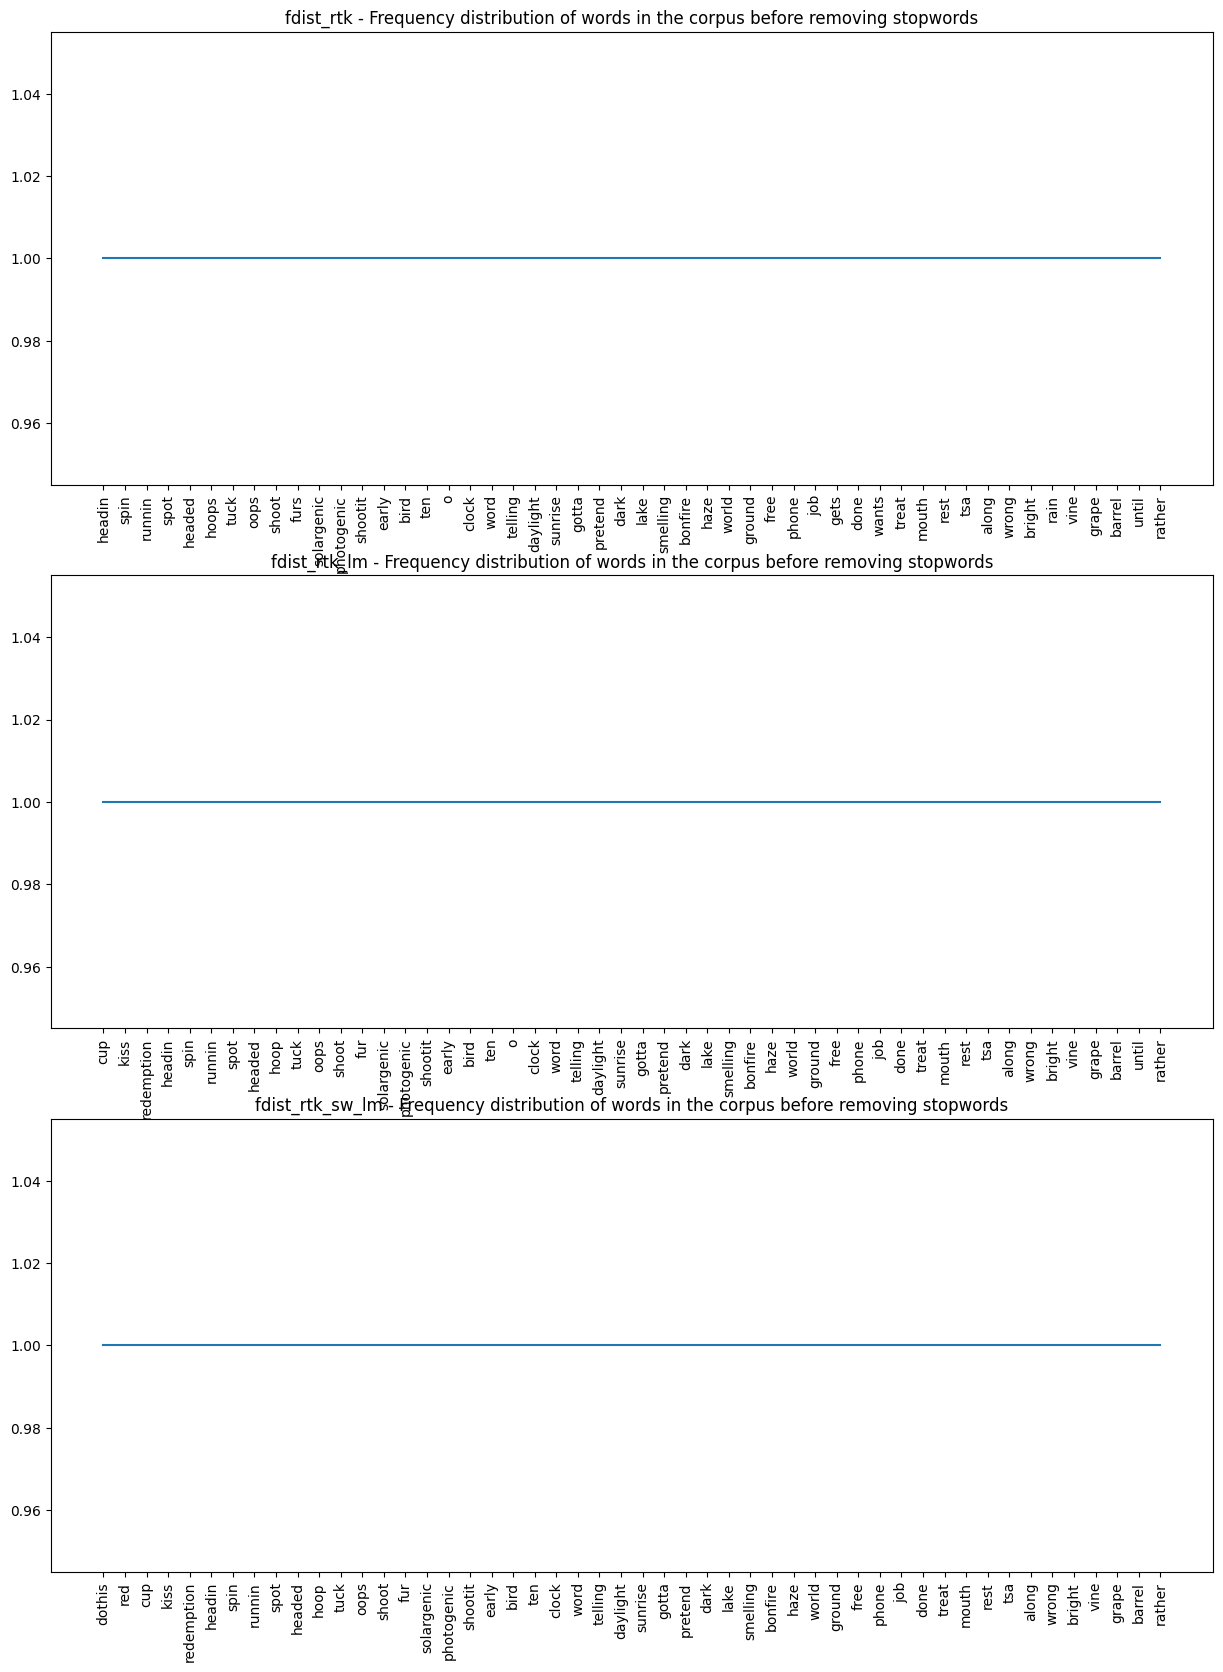

In [10]:
# plot the least common words

fig, axs = plt.subplots(3, 1, figsize=(15, 20))
# using corpus_raw_freq
for i, (key, value) in enumerate(corpus_raw_freq.items()):
    axs[i].plot(*zip(*value.most_common()[-show_top:]))
    axs[i].set_title(f'{key} - Frequency distribution of words in the corpus before removing stopwords')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# check the totall number of words in the corpus
words_rtk = []
words_sp_a = []
words_sp_a_lm = []
words_sp_a_sw_lm = []
words_rtk_lm = []
words_rtk_sw_lm = []
for text in corpus_processed:
    words_rtk += corpus_processed[text]['rtk']
    words_sp_a += corpus_processed[text]['tk_a']
    words_sp_a_lm += corpus_processed[text]['tk_a_lm']
    words_sp_a_sw_lm += corpus_processed[text]['tk_a_sw_lm']
    words_rtk_lm += corpus_processed[text]['rtk_lm']
    words_rtk_sw_lm += corpus_processed[text]['rtk_sw_lm']

words = pd.DataFrame(columns=['word_tokenize', 'split'], index=['raw', 'lemmatized', 'stopwords + lemmatized'])

words.loc['raw', 'word_tokenize'] = len(words_rtk)
words.loc['raw', 'split'] = len(words_sp_a)
words.loc['lemmatized', 'word_tokenize'] = len(words_rtk_lm)
words.loc['lemmatized', 'split'] = len(words_sp_a_lm)
words.loc['stopwords + lemmatized', 'word_tokenize'] = len(words_rtk_sw_lm)
words.loc['stopwords + lemmatized', 'split'] = len(words_sp_a_sw_lm)

print(f'\n\nTotal number of words in the corpus:')
print(words.to_markdown())

# check the types of the words in the corpus
types = pd.DataFrame(columns=['word_tokenize', 'split'], index=['raw', 'lemmatized', 'stopwords + lemmatized'])

types.loc['raw', 'word_tokenize'] = len(set(words_rtk))
types.loc['raw', 'split'] = len(set(words_sp_a))
types.loc['lemmatized', 'word_tokenize'] = len(set(words_rtk_lm))
types.loc['lemmatized', 'split'] = len(set(words_sp_a_lm))
types.loc['stopwords + lemmatized', 'word_tokenize'] = len(set(words_rtk_sw_lm))
types.loc['stopwords + lemmatized', 'split'] = len(set(words_sp_a_sw_lm))

print(f'\n\nTotal number of types in the corpus:')
print(types.to_markdown())



Total number of words in the corpus:
|                        |   word_tokenize |   split |
|:-----------------------|----------------:|--------:|
| raw                    |            3931 |    3573 |
| lemmatized             |            3931 |    3573 |
| stopwords + lemmatized |            1789 |    1742 |


Total number of types in the corpus:
|                        |   word_tokenize |   split |
|:-----------------------|----------------:|--------:|
| raw                    |             677 |     646 |
| lemmatized             |             654 |     625 |
| stopwords + lemmatized |             556 |     542 |


Total number of words in the corpus:
|                        |   word_tokenize |   split |
|:-----------------------|----------------:|--------:|
| raw                    |            3931 |    3573 |
| lemmatized             |            3931 |    3573 |
| stopwords + lemmatized |            1789 |    1742 |


Total number of types in the corpus:
|                        |   word_tokenize |   split |
|:-----------------------|----------------:|--------:|
| raw                    |             677 |     646 |
| lemmatized             |             654 |     625 |
| stopwords + lemmatized |             556 |     542 |

In [12]:
# check the number of tokens and types in each individual text, pre-processing

titles = [title[:-4] for title in corpus.fileids()]
tokens = []
types = []
for title in titles:
    text = corpus_dict[title]
    tokens.append(len(text))
    types.append(len(set(text)))

text_df = pd.DataFrame({'tokens': tokens, 'types': types}, index=titles)
print(text_df.to_markdown())

|                             |   tokens |   types |
|:----------------------------|---------:|--------:|
| A Bar Song (Tipsy)          |     2053 |      49 |
| Austin (Boots Stop Workin') |     1642 |      46 |
| Beautiful Things            |     1177 |      41 |
| Cruel Summer                |     2211 |      45 |
| Espresso                    |     1875 |      43 |
| Lose Control                |     1420 |      44 |
| Please Please Please        |     1439 |      39 |
| Stick Season                |     2053 |      41 |
| TEXAS HOLD 'EM              |     2732 |      46 |
| Too Sweet                   |     1549 |      42 |


|                             |   tokens |   types |
|:----------------------------|---------:|--------:|
| A Bar Song (Tipsy)          |     2053 |      49 |
| Austin (Boots Stop Workin') |     1642 |      46 |
| Beautiful Things            |     1177 |      41 |
| Cruel Summer                |     2211 |      45 |
| Espresso                    |     1875 |      43 |
| Lose Control                |     1420 |      44 |
| Please Please Please        |     1439 |      39 |
| Stick Season                |     2053 |      41 |
| TEXAS HOLD 'EM              |     2732 |      46 |
| Too Sweet                   |     1549 |      42 |

In [13]:
# Check the average number of types and tokens across the texts
print(f'Average number of tokens: {text_df["tokens"].mean()}')
print(f'Average number of types: {text_df["types"].mean()}')

Average number of tokens: 1815.1
Average number of types: 43.6


In [15]:
# Check the lexical diversity of the texts
text_df['lexical_diversity'] = text_df['types'] / text_df['tokens']
print(text_df)

# check the lexical diversity of the corpus
print(f'Lexical diversity of the corpus: {len(set(words_rtk_sw_lm)) / len(words_rtk_sw_lm)}')

                             tokens  types  lexical_diversity
A Bar Song (Tipsy)             2053     49           0.023868
Austin (Boots Stop Workin')    1642     46           0.028015
Beautiful Things               1177     41           0.034834
Cruel Summer                   2211     45           0.020353
Espresso                       1875     43           0.022933
Lose Control                   1420     44           0.030986
Please Please Please           1439     39           0.027102
Stick Season                   2053     41           0.019971
TEXAS HOLD 'EM                 2732     46           0.016837
Too Sweet                      1549     42           0.027114
Lexical diversity of the corpus: 0.31078814980436


In [30]:
# print the most common words in the corpus
least_common = corpus_raw_freq['fdist_rtk_sw_lm'].most_common(show_top)
# least_common = [word for word in least_common if len(word[0]) > 5]
least_common[:20]

[('oh', 51),
 ('please', 37),
 ('know', 31),
 ('ooh', 24),
 ('come', 22),
 ('baby', 19),
 ('take', 19),
 ('yeah', 19),
 ('got', 18),
 ('right', 18),
 ('sweet', 18),
 ('bar', 17),
 ('like', 17),
 ('whiskey', 16),
 ('one', 15),
 ('whoa', 15),
 ('want', 14),
 ('night', 14),
 ('gettin', 14),
 ('ya', 14)]

In [ ]:
# print the most common words in each text
for text in corpus_freq:
    print(f'{text} \t::: {corpus_freq[text]["fdist_rtk_sw_lm"].most_common(10)}')

A Bar Song (Tipsy) 	::: [('gettin', 14), ('bar', 13), ('tipsy', 13), ('everybody', 10), ('double', 7), ('shot', 7), ('whiskey', 7), ('two', 5), ('oh', 5), ('lord', 5)]
Austin (Boots Stop Workin') 	::: [('truck', 5), ('break', 5), ('ex', 5), ('find', 5), ('back', 4), ('way', 4), ('fight', 4), ('alibi', 4), ('get', 3), ('plan', 2)]
Beautiful Things 	::: [('oh', 8), ('got', 7), ('stay', 5), ('god', 5), ('thing', 5), ('take', 5), ('please', 5), ('need', 5), ('want', 4), ('beautiful', 4)]
Cruel Summer 	::: [('oh', 15), ('yeah', 10), ('summer', 9), ('ooh', 6), ('whoa', 6), ('cruel', 6), ('want', 5), ('right', 4), ('roll', 4), ('keep', 4)]
Espresso 	::: [('ya', 12), ('know', 11), ('oh', 9), ('espresso', 9), ('say', 8), ('sleep', 8), ('baby', 8), ('sweet', 6), ('guess', 6), ('yes', 6)]
Lose Control 	::: [('yeah', 6), ('lose', 6), ('control', 6), ('next', 4), ('see', 4), ('mm', 4), ('know', 3), ('like', 3), ('fallin', 3), ('apart', 3)]
Please Please Please 	::: [('please', 31), ('know', 5), ('n

In [23]:
# print the least common words with more than 7 characters in the corpus
least_common = corpus_raw_freq['fdist_rtk_sw_lm'].most_common()[-show_top:]
least_common = [word for word in least_common if len(word[0]) > 5]
least_common

[('dothis', 1),
 ('redemption', 1),
 ('headin', 1),
 ('runnin', 1),
 ('headed', 1),
 ('solargenic', 1),
 ('photogenic', 1),
 ('shootit', 1),
 ('telling', 1),
 ('daylight', 1),
 ('sunrise', 1),
 ('pretend', 1),
 ('smelling', 1),
 ('bonfire', 1),
 ('ground', 1),
 ('bright', 1),
 ('barrel', 1),
 ('rather', 1)]

In [34]:
# print all words with more than 8 characters in the corpus
words = corpus_raw_freq['fdist_rtk_sw_lm'].most_common()
words = [word for word in words if len(word[0]) > 8]
words

[('everybody', 10),
 ('beautiful', 4),
 ('breakable', 3),
 ('heartbreak', 3),
 ('christmas', 3),
 ('dancefloor', 2),
 ('forgotten', 2),
 ('terrified', 2),
 ('problematic', 2),
 ('embarrass', 2),
 ('motherfucker', 2),
 ('throughout', 1),
 ('everything', 1),
 ('headlight', 1),
 ('desperation', 1),
 ('espressosomething', 1),
 ('judgement', 1),
 ('different', 1),
 ('prolifically', 1),
 ('something', 1),
 ('inherited', 1),
 ('redemption', 1),
 ('solargenic', 1),
 ('photogenic', 1)]

From the above, we can se that the as expected from song lyrics, the word diversity is extremely low, even if we account in the entire corpus. There are also many filler words that was not expected from other text corpus (e.g. brown), words like `oh / woo / yeah / whoa / ya`. 

As I tested it out, I've decided not to remove these words as part of stopwords, as they do represent the songs styles in a way, and also there aren't many different words in a lyrics to begin with. 

We can also observe that the most complex words are also relatively "simple" in comparison to some of the other texts from other corpuses, which may work in favor of the popularity and ease of spread for the songs, as simpler words means more people can easily understand it and empathise with it.

however, as this is quite a small sample size (only 10 songs), I may see a different result after I expand the corpus, which may also allow me to observe changes over the years to song lyrics, and maybe able to spot some trends that may / may not have happened. This will be an extremely interesting expantion to the current project, and indicate how the population may / maynot be more accepting of certain ideas / words, or even be able to tell how the emotions (if possible) of the worlds at the times are.